In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import json

from contrastive.utils.config import get_config_diff

In [3]:
path = "/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/densenet"
get_config_diff(path)

In [9]:
def exclude_conditions(diff_config, excluded_conditions):
    excluded_subdirs = []
    for cond in excluded_conditions:
        filtered_diff_config = diff_config.query(cond)
        excluded_subdirs.extend(filtered_diff_config['Unnamed: 0'].values)
    return excluded_subdirs

dir_path = "/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/densenet"
diff_config = pd.read_csv(dir_path+'/config_diff.csv')
diff_config

#exclude_conditions(diff_config, excluded_conditions=["lr != 0.0004"])

Unnamed: 0  drop_rate  temperature  \
0                           tau-0.1_drop-0.0       0.00          0.1   
1                           tau-0.1_drop-0.1       0.10          0.1   
2             tau-0.1_drop-0.3_variablebatch       0.30          0.1   
3                           tau-0.5_drop-0.0       0.00          0.5   
4                         tau-0.5_drop-0.0_2       0.00          0.5   
5                         tau-0.5_drop-0.0_3       0.00          0.5   
6       tau-0.5_drop-0.0_percentage-variable       0.00          0.5   
7                           tau-0.5_drop-0.1       0.10          0.5   
8                          tau-0.5_drop-0.15       0.15          0.5   
9      tau-0.5_drop-0.15_percentage-variable       0.15          0.5   
10  tau-0.5_drop-0.15_percentage-variable-75       0.15          0.5   
11                        tau-0.5_drop-0.1_2       0.10          0.5   
12          tau-0.5_drop-0.2_drop-output-0.0       0.20          0.5   
13          tau-0.5_drop-0.2_drop-output-0.1       0.20          0.5   

    temperature_initial  
0                   0.1  
1                   0.5  
2                   0.1  
3                   0.5  
4                   0.5  
5                   0.5  
6                   0.5  
7                   0.5  
8                   0.5  
9                   0.5  
10                  0.5  
11                  0.5  
12                  0.5  
13                  0.5

In [10]:
def show_results(dir_path, figsize=(16,10), return_config_diff=False, excluded_conditions=[]):
    # be sure that all models are comparable
    get_config_diff(dir_path, whole_config=False)
    diff_config = pd.read_csv(dir_path+'/config_diff.csv')

    excluded_subdirs = exclude_conditions(diff_config, excluded_conditions)
    if excluded_conditions != []:
        print("Excluded subdirs :", excluded_subdirs)
        print("Excluded because of ", excluded_conditions)

    print(diff_config[~diff_config['Unnamed: 0'].isin(excluded_subdirs)])

    paths = []
    accuracy = []
    accuracy_std = []
    auc = []
    auc_std = []
    # plot all ROC curves
    for subdir in os.listdir(dir_path):
        if os.path.isdir(dir_path + '/' + subdir) and subdir not in excluded_subdirs:
            path = dir_path + '/' + subdir + '/cingulate_ACCpatterns_embeddings'
            with open(path+'/values.json', 'r') as file:
                values = json.load(file)
            print(subdir)
            print("AUC", values['cross_val_auc'])
            img = mpi.imread(path+'/cross_val_ROC_curves.png')
            plt.figure(figsize=figsize)
            plt.imshow(img)
            plt.show()

            # store the AUC and accuracy in a df
            paths.append(subdir)
            accuracy.append(values['cross_val_total_accuracy'][0])
            accuracy_std.append(values['cross_val_total_accuracy'][1])
            auc.append(values['cross_val_auc'][0])
            auc_std.append(values['cross_val_auc'][1])

    results_df = pd.DataFrame()
    results_df['path'] = paths
    results_df['auc'] = auc
    results_df['auc_std'] = auc_std
    results_df['accuracy'] = accuracy
    results_df['accuracy_std'] = accuracy_std


    if return_config_diff:
        return results_df, diff_config
    else:
        return results_df

                                  Unnamed: 0  drop_rate  temperature  \
0                           tau-0.1_drop-0.0       0.00          0.1   
1                           tau-0.1_drop-0.1       0.10          0.1   
2                           tau-0.5_drop-0.0       0.00          0.5   
3                         tau-0.5_drop-0.0_2       0.00          0.5   
4                         tau-0.5_drop-0.0_3       0.00          0.5   
5       tau-0.5_drop-0.0_percentage-variable       0.00          0.5   
6                           tau-0.5_drop-0.1       0.10          0.5   
7                          tau-0.5_drop-0.15       0.15          0.5   
8   tau-0.5_drop-0.15_percentage-variable-75       0.15          0.5   
9                         tau-0.5_drop-0.1_2       0.10          0.5   
10          tau-0.5_drop-0.2_drop-output-0.0       0.20          0.5   
11          tau-0.5_drop-0.2_drop-output-0.1       0.20          0.5   

    temperature_initial  
0                   0.1  
1          

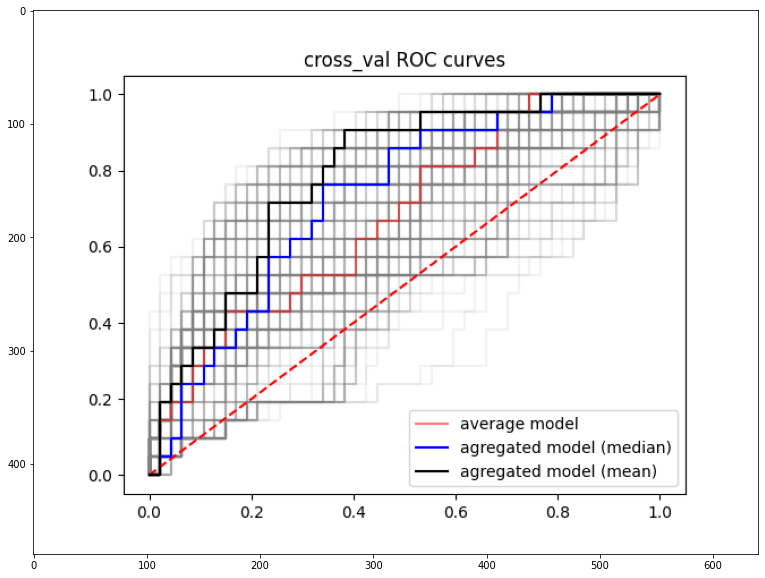

tau-0.1_drop-0.1
AUC [0.5578399189463018, 0.06382768250498178]


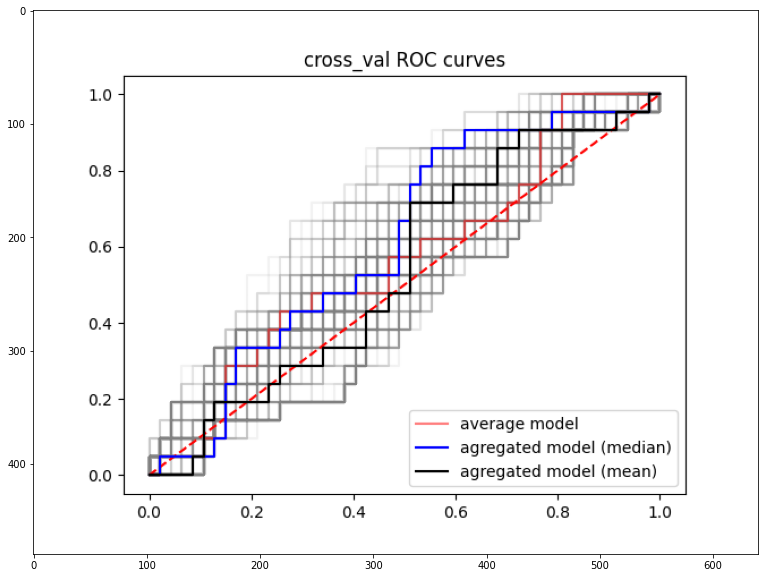

tau-0.5_drop-0.0_3
AUC [0.7904275582573455, 0.08015607895434278]


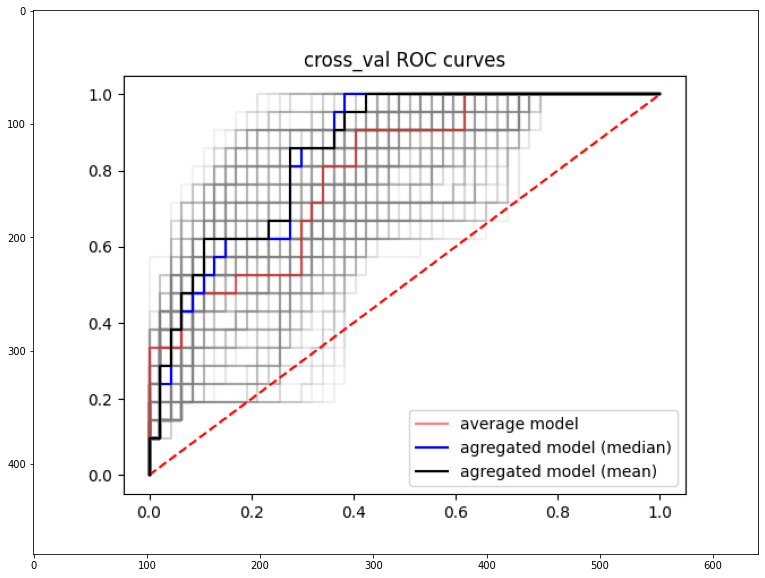

tau-0.5_drop-0.1
AUC [0.6520567375886525, 0.10145402908193465]


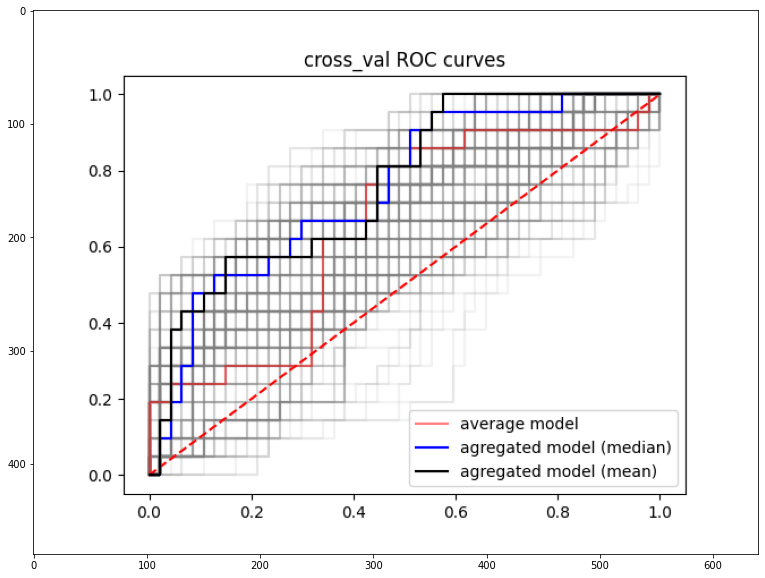

tau-0.5_drop-0.2_drop-output-0.1
AUC [0.6923606889564337, 0.07886553978647642]


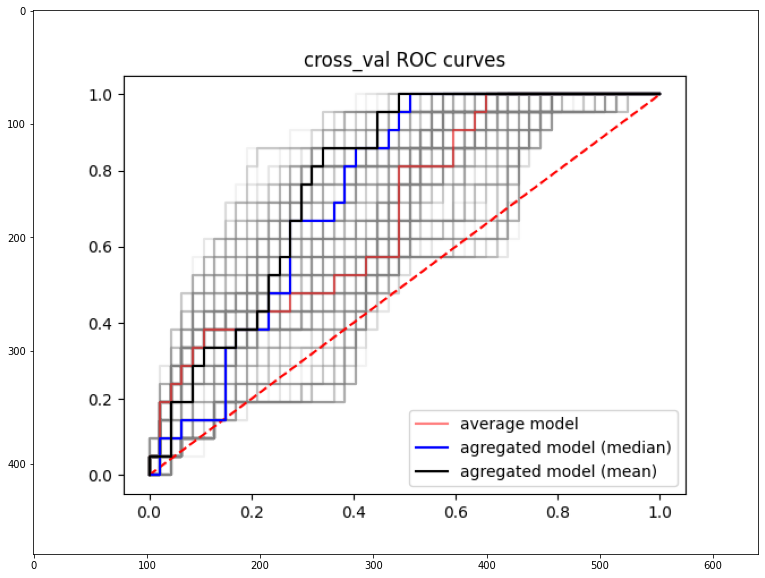

tau-0.5_drop-0.2_drop-output-0.0
AUC [0.7259777102330294, 0.08000158338515732]


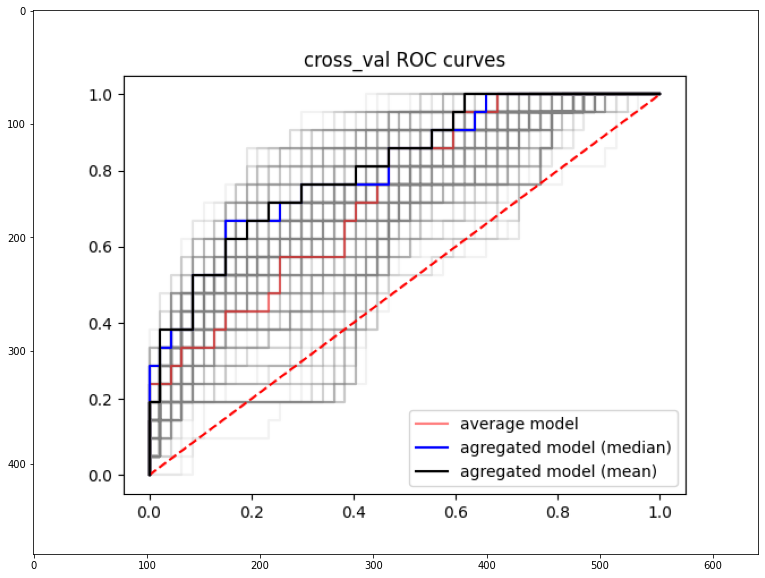

tau-0.5_drop-0.1_2
AUC [0.5841337386018238, 0.11891015538964823]


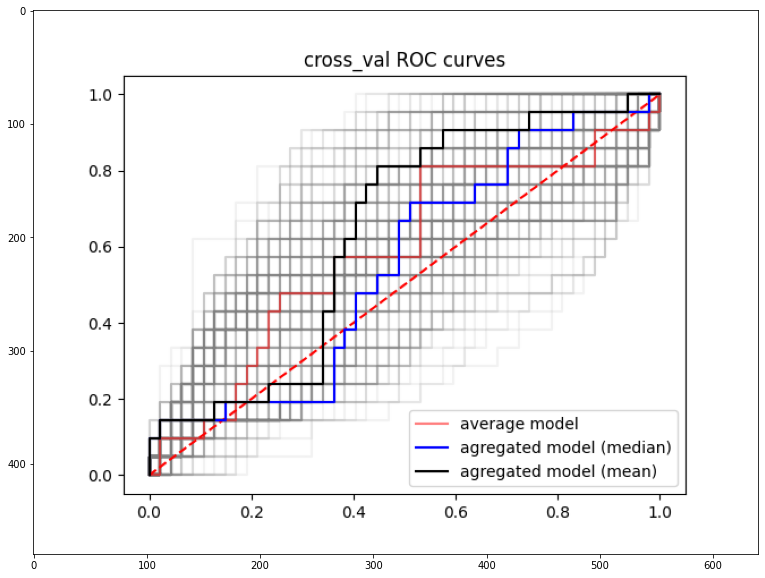

tau-0.5_drop-0.15
AUC [0.5959311043566363, 0.07369135091043935]


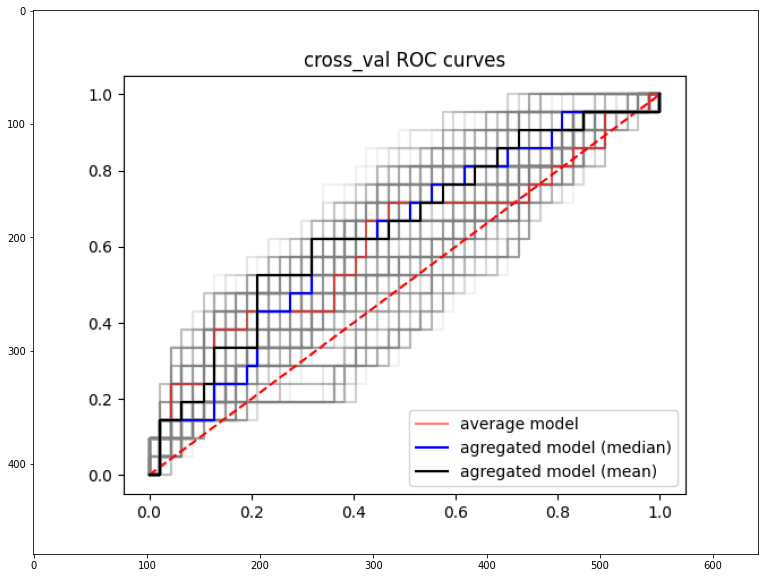

tau-0.5_drop-0.0_percentage-variable
AUC [0.7088267477203647, 0.08142184287170307]


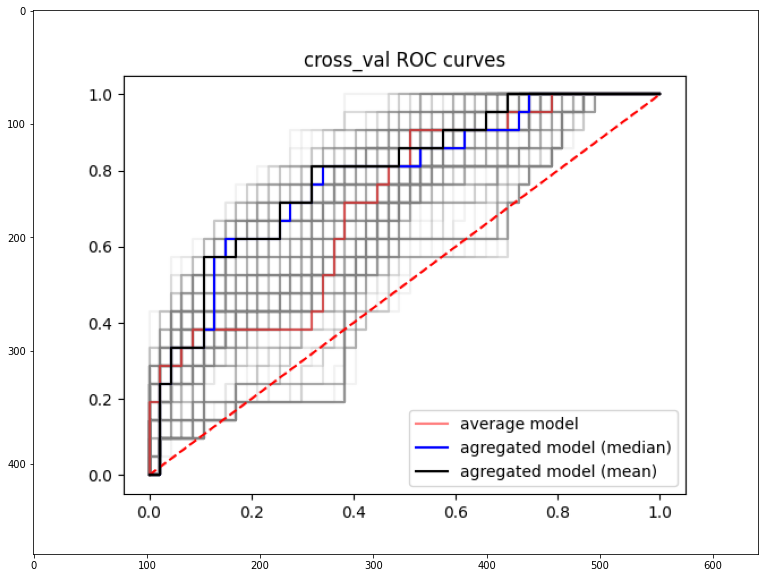

tau-0.5_drop-0.15_percentage-variable-75
AUC [0.6297953394123605, 0.09517058945375922]


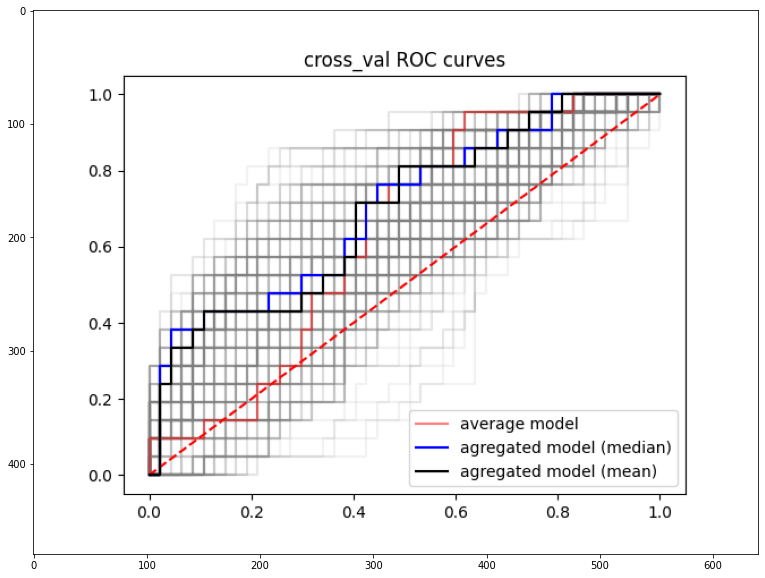

tau-0.1_drop-0.0
AUC [0.5200364741641338, 0.058089055407441643]


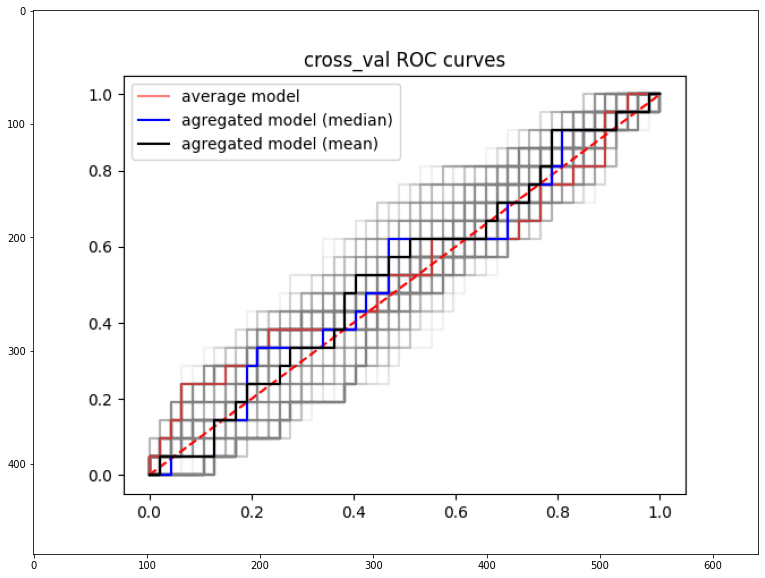

tau-0.5_drop-0.0_2
AUC [0.7111975683890578, 0.08874013727642018]


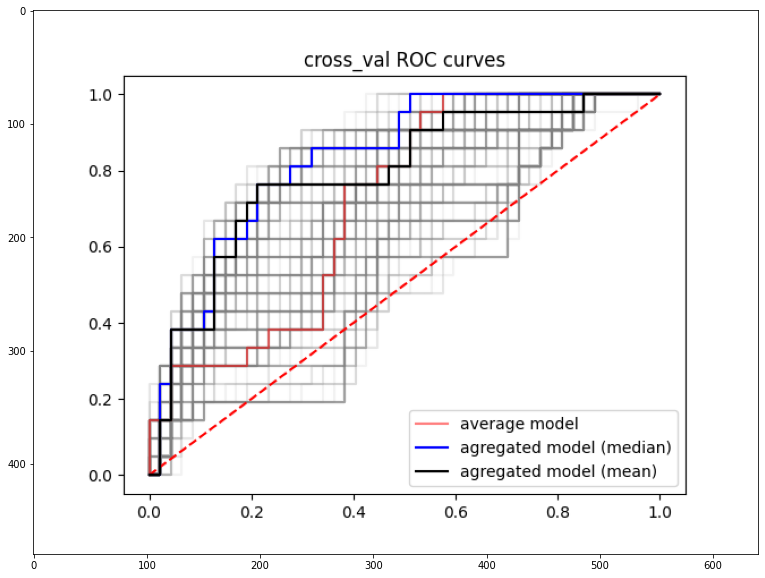

path       auc   auc_std  accuracy  \
0                           tau-0.5_drop-0.0  0.674886  0.106186  0.667412   
1                           tau-0.1_drop-0.1  0.557840  0.063828  0.569706   
2                         tau-0.5_drop-0.0_3  0.790428  0.080156  0.700176   
3                           tau-0.5_drop-0.1  0.652057  0.101454  0.638412   
4           tau-0.5_drop-0.2_drop-output-0.1  0.692361  0.078866  0.622176   
5           tau-0.5_drop-0.2_drop-output-0.0  0.725978  0.080002  0.666000   
6                         tau-0.5_drop-0.1_2  0.584134  0.118910  0.622471   
7                          tau-0.5_drop-0.15  0.595931  0.073691  0.597529   
8       tau-0.5_drop-0.0_percentage-variable  0.708827  0.081422  0.630765   
9   tau-0.5_drop-0.15_percentage-variable-75  0.629795  0.095171  0.635412   
10                          tau-0.1_drop-0.0  0.520036  0.058089  0.583471   
11                        tau-0.5_drop-0.0_2  0.711198  0.088740  0.639294   

    accuracy_std  
0       0.073088  
1       0.118658  
2       0.080350  
3       0.096749  
4       0.083910  
5       0.097739  
6       0.073206  
7       0.104534  
8       0.101988  
9       0.099459  
10      0.110319  
11      0.123502

In [14]:
excluded_conditions = []

results_df = show_results("/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/densenet",
excluded_conditions=excluded_conditions)

results_df

In [15]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
2                         tau-0.5_drop-0.0_3  0.790428
5           tau-0.5_drop-0.2_drop-output-0.0  0.725978
11                        tau-0.5_drop-0.0_2  0.711198
8       tau-0.5_drop-0.0_percentage-variable  0.708827
4           tau-0.5_drop-0.2_drop-output-0.1  0.692361
0                           tau-0.5_drop-0.0  0.674886
3                           tau-0.5_drop-0.1  0.652057
9   tau-0.5_drop-0.15_percentage-variable-75  0.629795
7                          tau-0.5_drop-0.15  0.595931
6                         tau-0.5_drop-0.1_2  0.584134
1                           tau-0.1_drop-0.1  0.557840
10                          tau-0.1_drop-0.0  0.520036

/volatile/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Program/2022_jchavas_cingulate_inhibitory_control/contrastive/utils/config.py:123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  global_df = pd.concat([global_df, config_df], axis=0)


                                          Unnamed: 0 backbone_name  drop_rate  \
0            tau-0.5_drop-0.0_percentage-variable-75       convnet       0.00   
1          tau-0.5_drop-0.15_cutout_backbone-convnet           NaN       0.15   
2  tau-0.5_drop-0.15_percentage-variable-75_backb...           NaN       0.15   
3  tau-0.5_drop-0.15_percentage-variable-75_backb...       convnet       0.15   
4  tau-0.5_drop-0.25_percentage-variable-75_backb...           NaN       0.25   
5  tau-0.5_drop-0.2_percentage-variable-75_backbo...           NaN       0.15   
6  tau-0.5_drop-0.3_percentage-variable-75_backbo...           NaN       0.30   

   early_stopping_patience  foldlabel  max_angle      patch_size  \
0                      100       True          6             NaN   
1                      250      False         10  [1, 9, 22, 21]   
2                      250       True          6             NaN   
3                      100       True          6             NaN   
4          

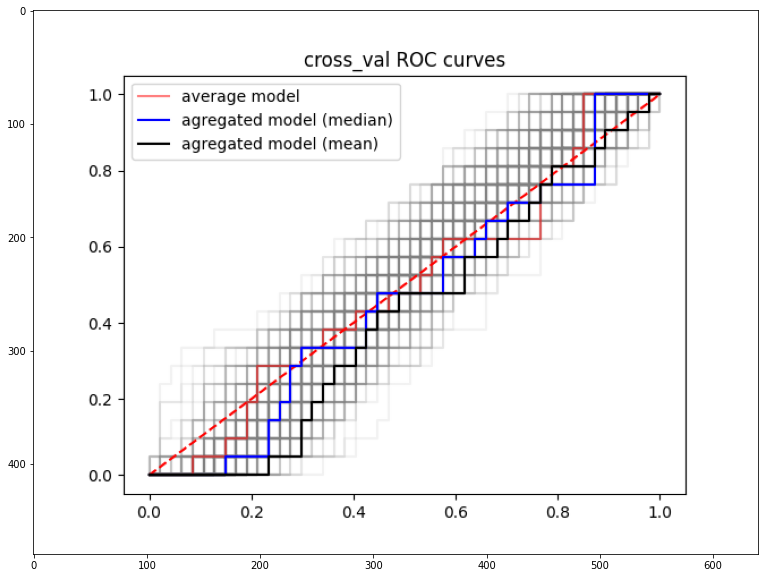

tau-0.5_drop-0.0_percentage-variable-75
AUC [0.5627720364741642, 0.09388947962022412]


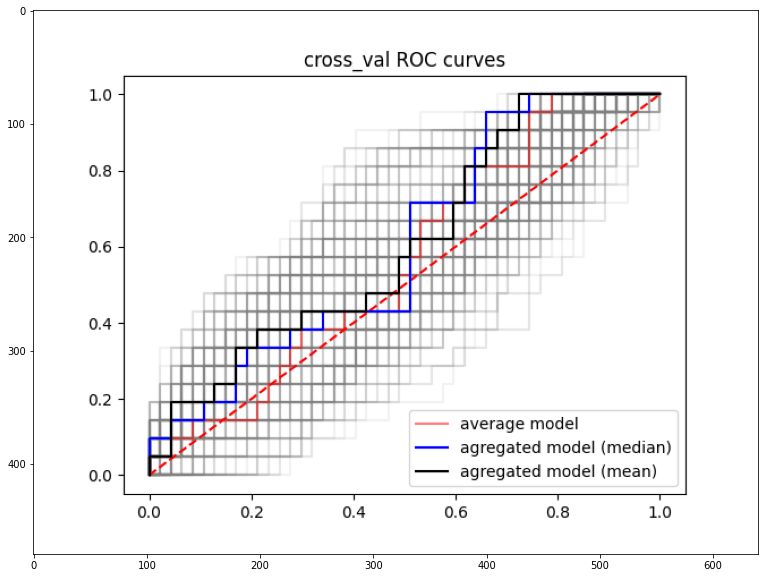

tau-0.5_drop-0.15_cutout_backbone-convnet
AUC [0.5149138804457952, 0.08362887145886067]


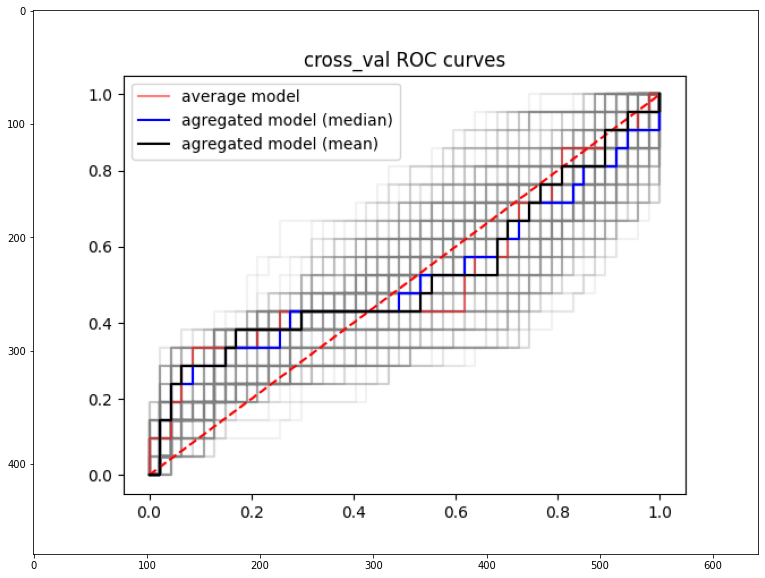

tau-0.5_drop-0.25_percentage-variable-75_backbone-convnet
AUC [0.36738804457953395, 0.10796514149720135]


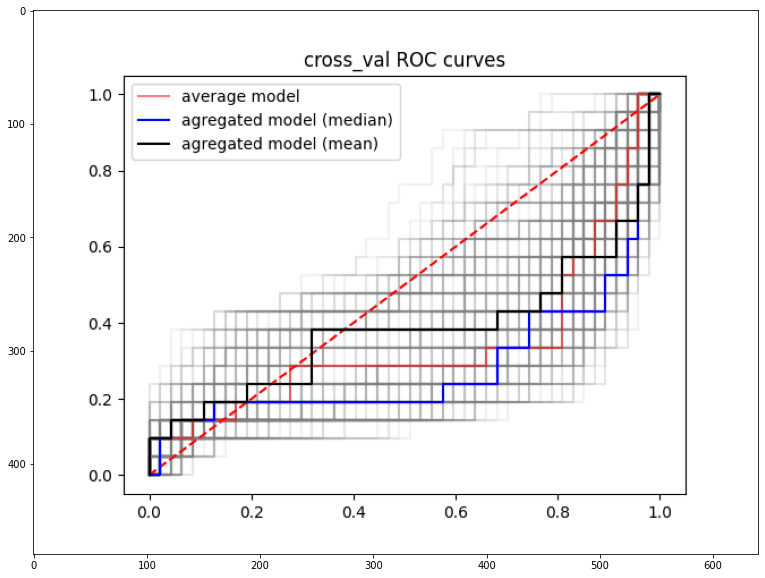

tau-0.5_drop-0.15_percentage-variable-75_backbone-convnet_2
AUC [0.481531914893617, 0.04646467770058261]


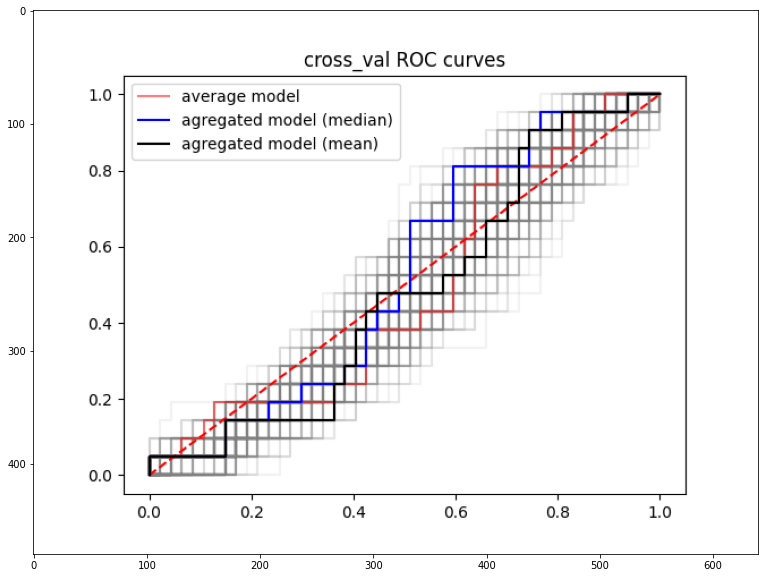

tau-0.5_drop-0.2_percentage-variable-75_backbone-convnet
AUC [0.508838905775076, 0.05888613419413187]


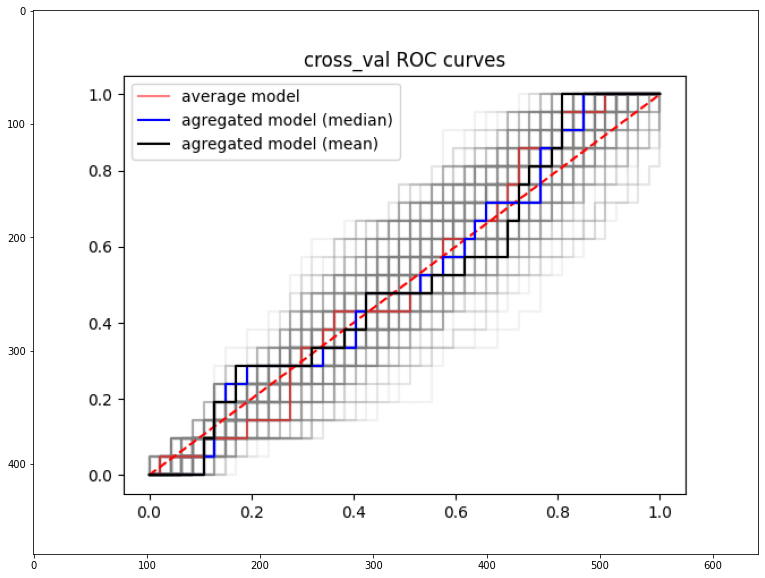

tau-0.5_drop-0.15_percentage-variable-75_backbone-convnet
AUC [0.5013171225937183, 0.061914561197816353]


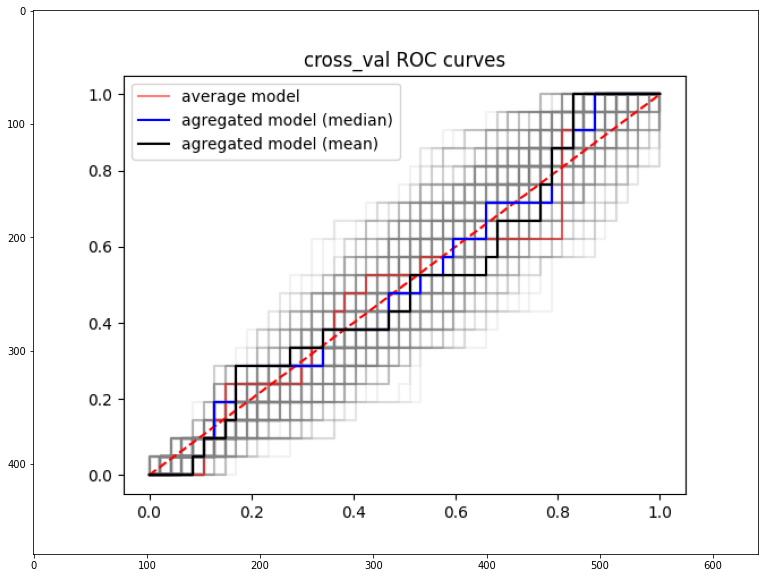

path       auc   auc_std  \
0  tau-0.5_drop-0.3_percentage-variable-75_backbo...  0.494890  0.061100   
1            tau-0.5_drop-0.0_percentage-variable-75  0.562772  0.093889   
2          tau-0.5_drop-0.15_cutout_backbone-convnet  0.514914  0.083629   
3  tau-0.5_drop-0.25_percentage-variable-75_backb...  0.367388  0.107965   
4  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.481532  0.046465   
5  tau-0.5_drop-0.2_percentage-variable-75_backbo...  0.508839  0.058886   
6  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.501317  0.061915   

   accuracy  accuracy_std  
0  0.684294      0.014595  
1  0.640824      0.077700  
2  0.691529      0.030021  
3  0.671471      0.029501  
4  0.613353      0.054943  
5  0.617941      0.040721  
6  0.614294      0.038348

In [19]:
excluded_conditions = []

results_df = show_results("/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/convnet",
excluded_conditions=excluded_conditions)

results_df

In [20]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
1            tau-0.5_drop-0.0_percentage-variable-75  0.562772
2          tau-0.5_drop-0.15_cutout_backbone-convnet  0.514914
5  tau-0.5_drop-0.2_percentage-variable-75_backbo...  0.508839
6  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.501317
0  tau-0.5_drop-0.3_percentage-variable-75_backbo...  0.494890
4  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.481532
3  tau-0.5_drop-0.25_percentage-variable-75_backb...  0.367388

       Unnamed: 0  batch_size  drop_rate  foldlabel       input_size  \
0     1mm_fold_30          16       0.15       True  (1, 22, 46, 38)   
1      1mm_fold_4          16       0.15       True  (1, 22, 46, 38)   
2       1mm_no_30          16       0.15      False  (1, 22, 46, 38)   
3        1mm_no_4          16       0.15      False  (1, 22, 46, 38)   
4     1mm_no_4(2)          16       0.15      False  (1, 22, 46, 38)   
5          T_0.01          16       0.15      False  (1, 17, 40, 38)   
6           T_0.5          16       0.15      False  (1, 17, 40, 38)   
7             T_1          16       0.15      False  (1, 17, 40, 38)   
8           base1          16       0.15      False  (1, 17, 40, 38)   
9           base2          16       0.15      False  (1, 17, 40, 38)   
10          base3          16       0.15      False  (1, 17, 40, 38)   
11   batch_size_4           4       0.15      False  (1, 17, 40, 38)   
12  batch_size_64          64       0.15      False  (1, 17, 40,

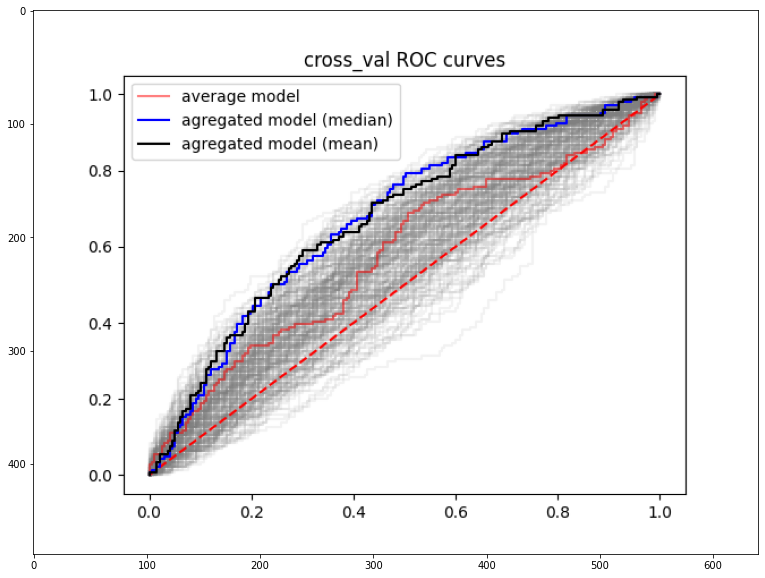

drop_rate_0.6
AUC [0.5306190073322052, 0.04491732965441525]


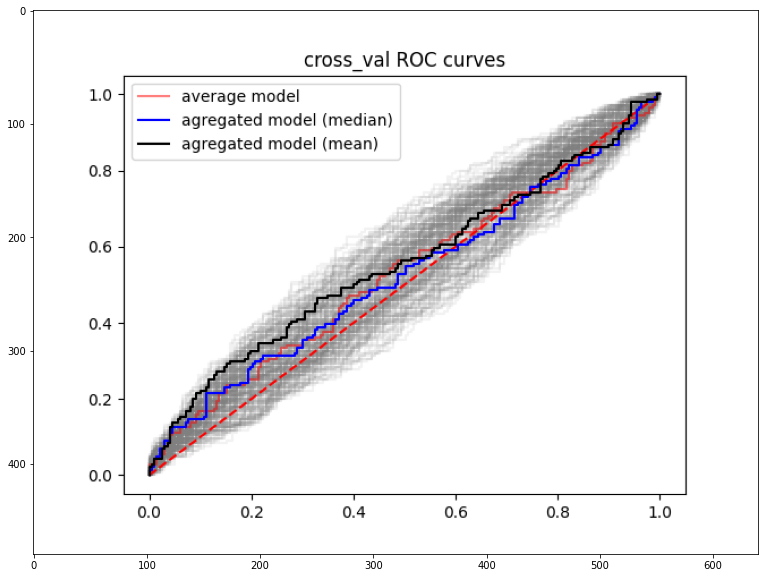

T_1
AUC [0.6556744218838128, 0.03923542967873721]


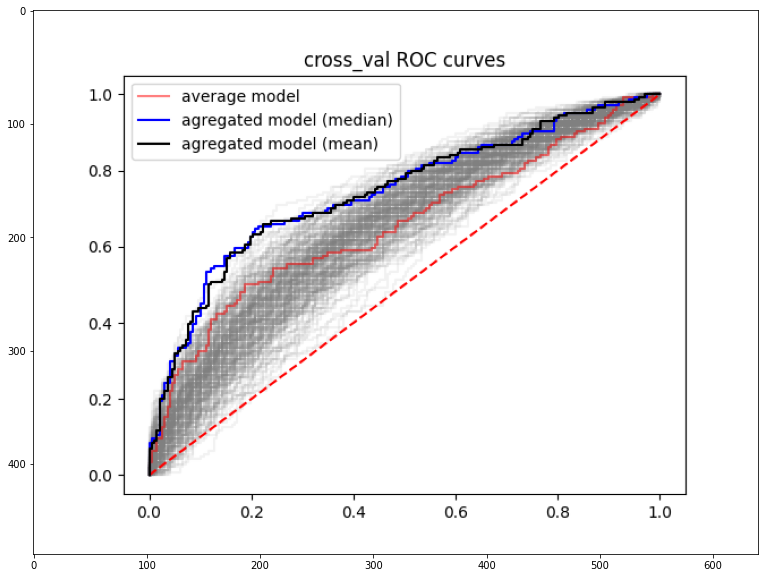

drop_rate_0.3
AUC [0.6098822617033277, 0.047838708739584776]


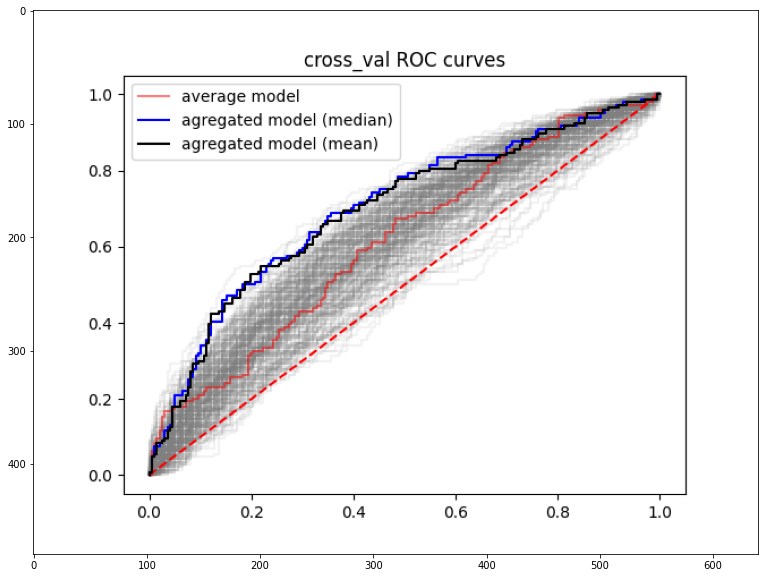

T_0.5
AUC [0.6242667794698252, 0.045173011362606555]


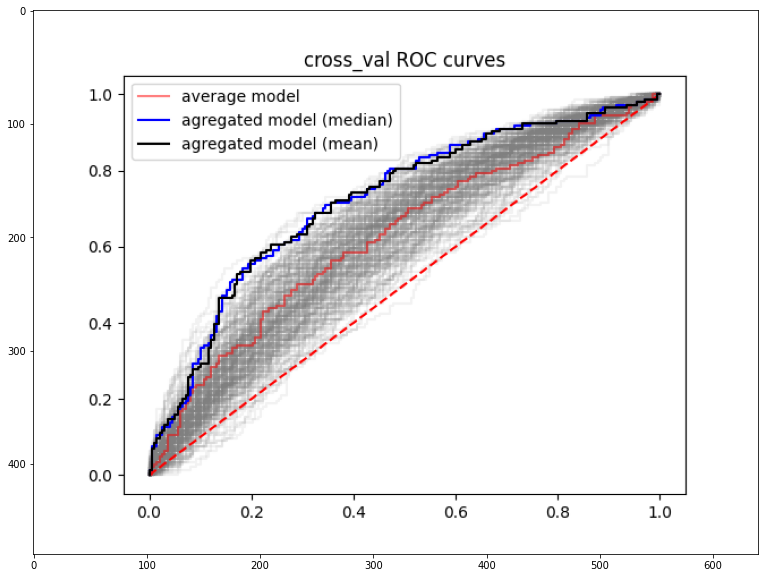

batch_size_64
AUC [0.6366903553299493, 0.04478391910327635]


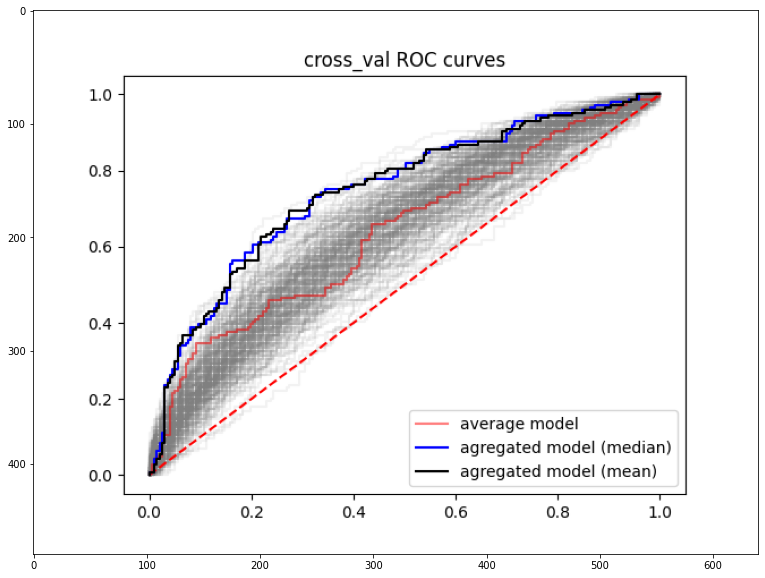

1mm_no_4(2)
AUC [0.569887760857304, 0.046849207946765725]


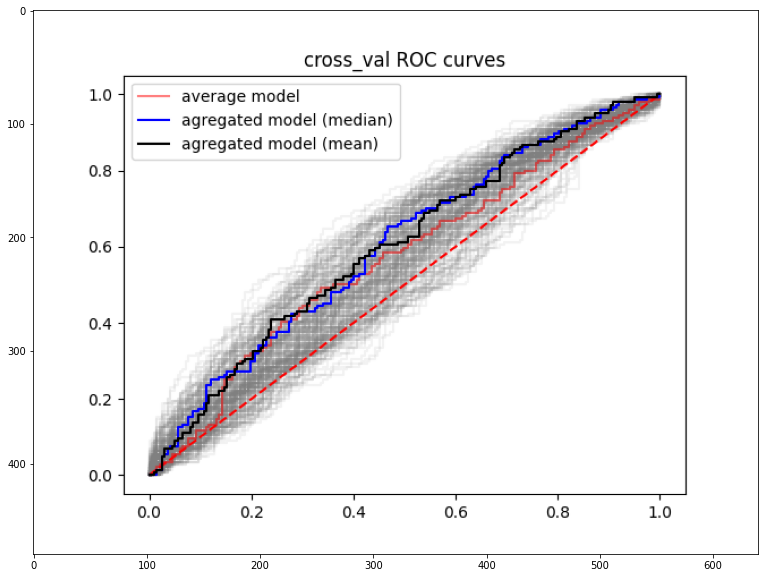

batch_size_4
AUC [0.6176228144388042, 0.044589424149593174]


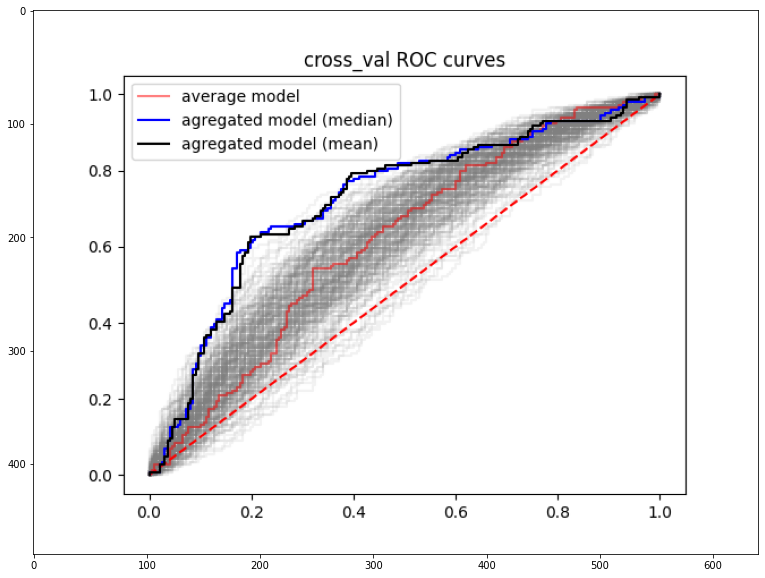

T_0.01
AUC [0.6263353073886069, 0.050238326156129144]


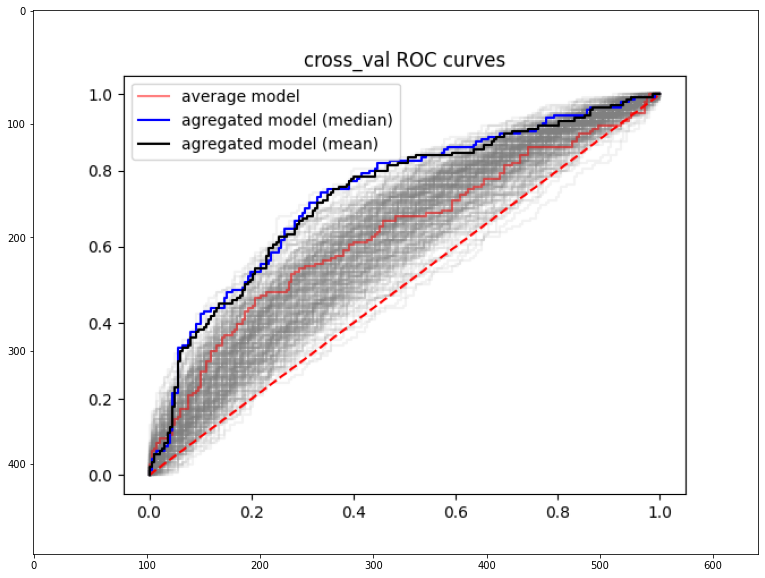

base2
AUC [0.6481143542019177, 0.04404085213475138]


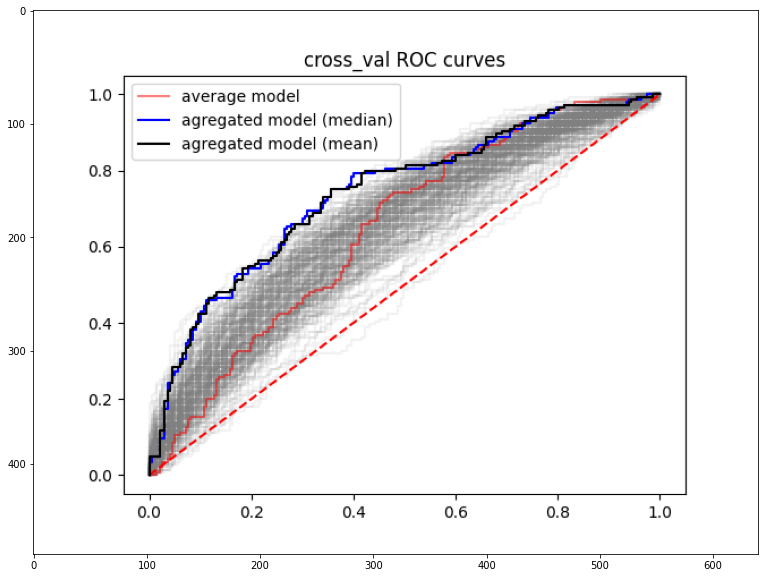

drop_rate_0
AUC [0.6541638465877044, 0.04183625292598137]


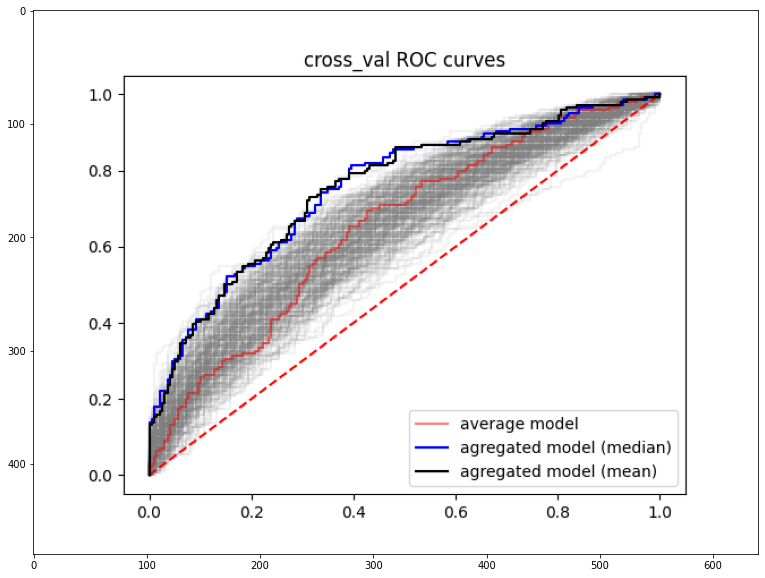

base1
AUC [0.673959108855048, 0.04164537487356842]


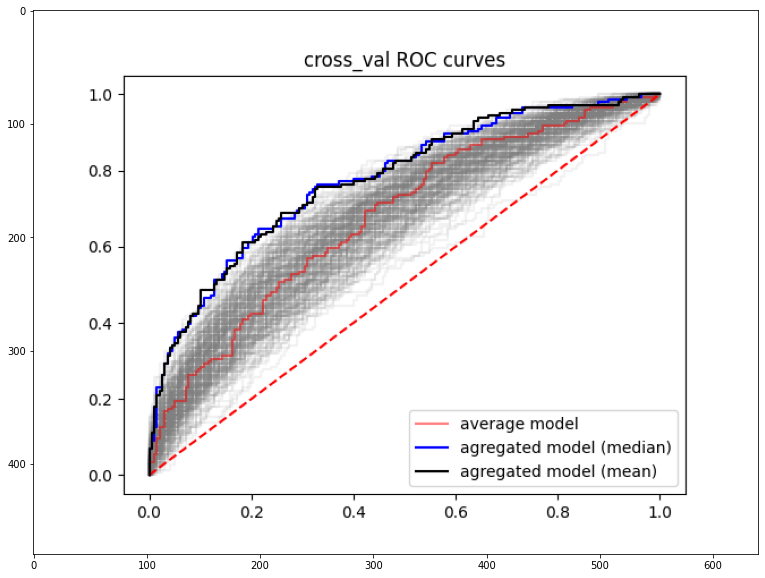

1mm_no_4
AUC [0.4884705301748449, 0.035179791318902316]


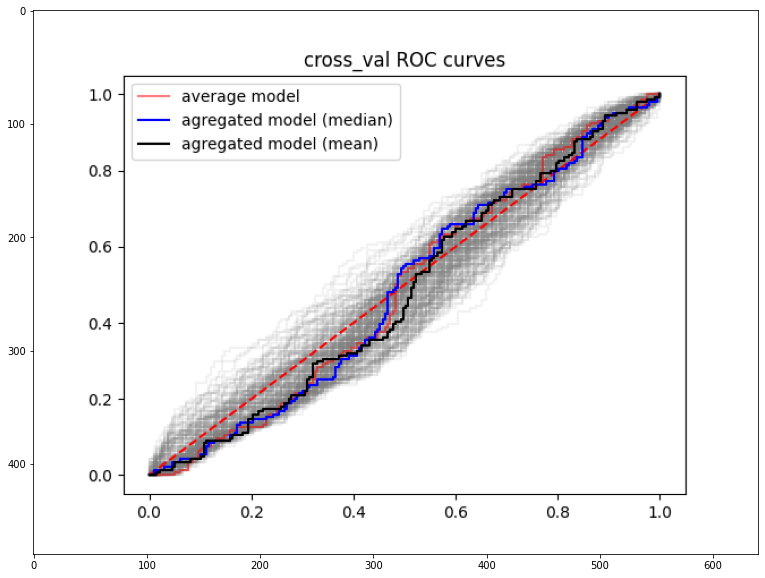

1mm_fold_30
AUC [0.5865493513818387, 0.03723043254420536]


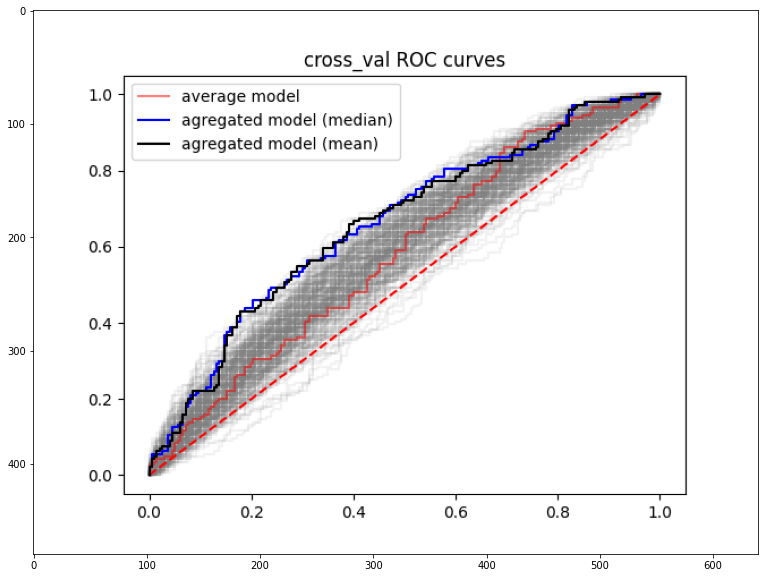

base3
AUC [0.6447695995487873, 0.040686019034973216]


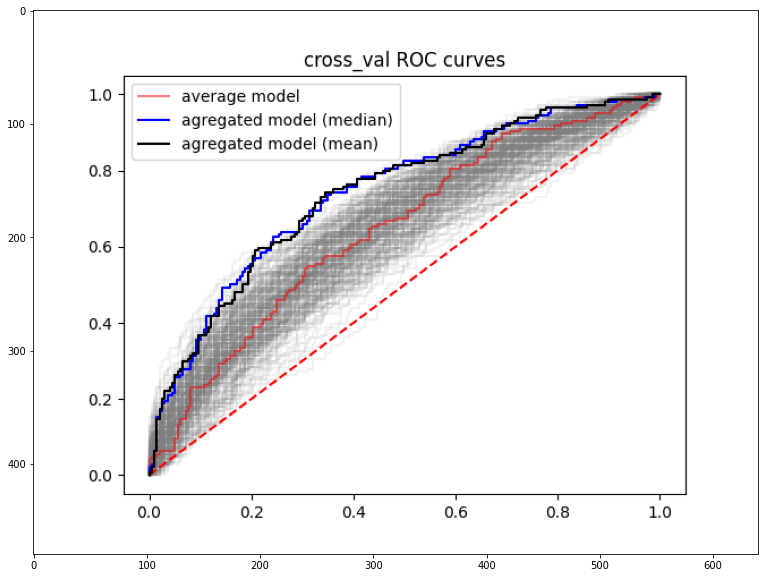

1mm_no_30
AUC [0.5822251833051325, 0.041573037169192716]


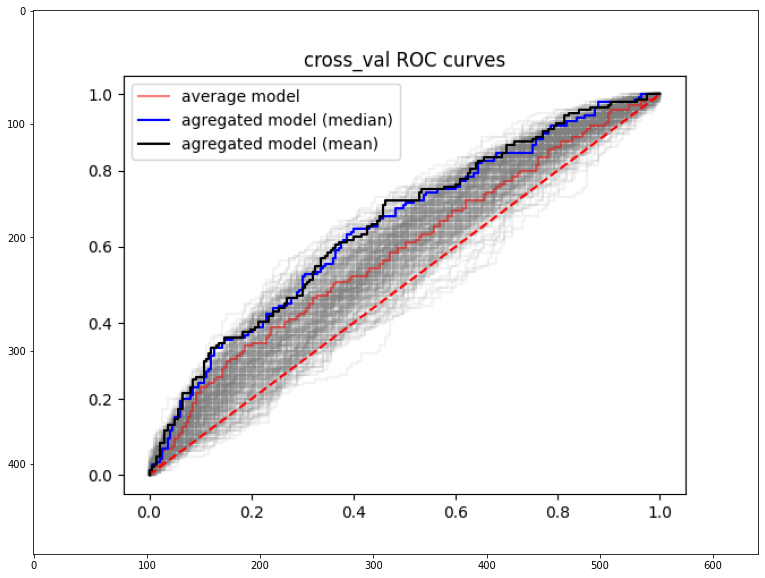

path       auc   auc_std  accuracy  accuracy_std
0      1mm_fold_4  0.574575  0.063551  0.555718      0.051553
1   drop_rate_0.6  0.530619  0.044917  0.518217      0.051808
2             T_1  0.655674  0.039235  0.618815      0.039304
3   drop_rate_0.3  0.609882  0.047839  0.585232      0.038250
4           T_0.5  0.624267  0.045173  0.595320      0.039513
5   batch_size_64  0.636690  0.044784  0.606639      0.035734
6     1mm_no_4(2)  0.569888  0.046849  0.552891      0.040838
7    batch_size_4  0.617623  0.044589  0.590909      0.040715
8          T_0.01  0.626335  0.050238  0.598792      0.041902
9           base2  0.648114  0.044041  0.611543      0.037142
10    drop_rate_0  0.654164  0.041836  0.616446      0.036519
11          base1  0.673959  0.041645  0.629466      0.034312
12       1mm_no_4  0.488471  0.035180  0.548809      0.032750
13    1mm_fold_30  0.586549  0.037230  0.562088      0.034258
14          base3  0.644770  0.040686  0.610534      0.032800
15      1mm_no_30  0.582225  0.041573  0.553138      0.043799

In [7]:
# convnet exploration
excluded_conditions = []

results_df = show_results("/neurospin/dico/agaudin/Runs/03_monkeys/Output/convnet_exploration",
excluded_conditions=excluded_conditions)

results_df

In [8]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
11          base1  0.673959
2             T_1  0.655674
10    drop_rate_0  0.654164
9           base2  0.648114
14          base3  0.644770
5   batch_size_64  0.636690
8          T_0.01  0.626335
4           T_0.5  0.624267
7    batch_size_4  0.617623
3   drop_rate_0.3  0.609882
13    1mm_fold_30  0.586549
15      1mm_no_30  0.582225
0      1mm_fold_4  0.574575
6     1mm_no_4(2)  0.569888
1   drop_rate_0.6  0.530619
12       1mm_no_4  0.488471

In [11]:
# directories are supposed to have a certain structure and name patterns
def get_results_table(dir_path, model_types=['convnet', 'densenet2'], verbose=False):
    results = {k: {} for k in model_types}

    for model_type in os.listdir(dir_path):
        if model_type in model_types:
            if verbose:
                print(model_type)
            path = os.path.join(dir_path, model_type)
            for params in os.listdir(path):
                params_path = os.path.join(path, params)
                if os.path.isdir(params_path):
                    if verbose:
                        print(params)
                    
                    n_models = 0

                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = 0
                        results[model_type]['no_foldlabel_'+params] = 0
                    else:    
                        results[model_type][params] = 0
                    
                    for model in os.listdir(params_path):
                        model_path = os.path.join(params_path, model)
                        # start a model name by & to filter it out of the performance analysis
                        if os.path.isdir(model_path) and model[0] != '&':
                            if verbose:
                                print(model)

                            n_models += 1

                            if model_type == 'pca':
                                values = os.path.join(params_path, model, 'values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type]['foldlabel_'+params] += values['cross_val_auc'][0]
                                results[model_type]['no_foldlabel_'+params] += values['cross_val_auc'][0]
                            else:
                                values = os.path.join(params_path, model, 'cingulate_ACCpatterns_embeddings/values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type][params] += values['cross_val_auc'][0]
                    
                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = results[model_type]['foldlabel_'+params]/n_models
                        results[model_type]['no_foldlabel_'+params] = results[model_type]['no_foldlabel_'+params]/n_models
                    else:
                        results[model_type][params] = results[model_type][params]/n_models
    
    results_df = pd.DataFrame(results)
    results_df.sort_index(inplace=True)
    return results_df

In [12]:
dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders"
results_df = get_results_table(dir_path, model_types=['convnet', 'densenet2', 'pca'])

results_df.to_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/performance_comparison_5000.csv")

results_df

convnet  densenet2       pca
foldlabel_30     0.613729   0.658608  0.593625
foldlabel_4      0.589703   0.574395  0.538784
no_foldlabel_30  0.649748   0.575910  0.593625
no_foldlabel_4   0.514435   0.488433  0.538784